In [15]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [27]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']].apply(pd.to_numeric) #pd.to_numeric converts into a float data type
sqrt_feature = X.apply(np.sqrt) #".apply" applies the function, in this case "sqrt", to the enitre dataframe
regr.fit(sqrt_feature, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[0.96780469 1.55683139 0.04403645]]

Intercept: 
 [-4.22436341]

R-squared:
-1216.261094376435


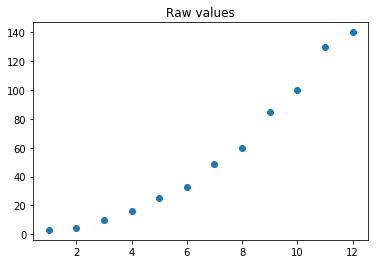

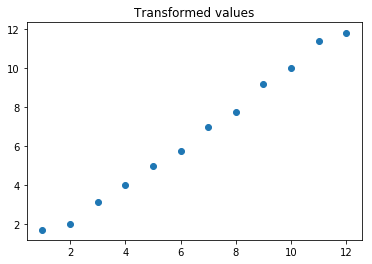

In [22]:
# Assumption One: Linear Relationship

# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

In [23]:
X.dtypes

TV           float64
Radio        float64
Newspaper    float64
dtype: object

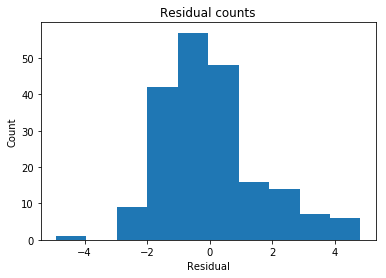

In [29]:
# Assumption Two: Multivariate Normality

# Extract predicted values.
predicted = regr.predict(sqrt_feature).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [ ]:
# Lets look into a log transformation for this particular dataset

In [28]:
sqrt_feature

,TV,Radio,Newspaper
0,15.169,6.148,8.319
1,6.671,6.269,6.716
2,4.147,6.775,8.325
3,12.309,6.427,7.649
4,13.446,3.286,7.642
5,2.950,6.993,8.660
6,7.583,5.727,4.848
7,10.964,4.427,3.406
8,2.933,1.449,1.000
9,14.135,1.612,4.604


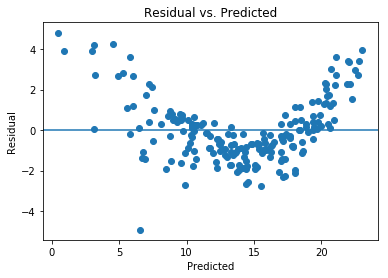

In [30]:
# Assumption Three: Homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [31]:
# Assumption Four: Low Multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000
